In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

In [2]:
###To work the script requires an excel file with historical GDP per capita data. The layout of the file should be such that there is a "year" column and then country columns named by country (or something similar).
file ="###.xlsx"
sheet = "###"
DatesColumn = "###"

In [3]:
##Reading in data:
data = pd.read_excel(file,sheet_name=sheet)

##Data needs to be clean/compatable so lines such as the following may be necessary:
data = data.drop(data.index[0])
data = data[data[DatesColumn]>1879]
data=data.reset_index(drop=True)

FileNotFoundError: [Errno 2] No such file or directory: '###.xlsx'

In [4]:
def trendlines(ax,df,years,country,year1,year2):
    '''Trendline plotter'''
    ##Identifying the index values of the local maxima of the series:
    
    if year1 & year2:
        mask1 = df[years] >=year1
        mask2 = df[years] <=year2
        series = np.log(df[country][mask1&mask2].astype("float"))
        peaks = scipy.signal.find_peaks(series)
        
        
    elif year1:
        mask1 = df[years] >= year1
        series = np.log(df[country][mask1].astype("float"))
        peaks = scipy.signal.find_peaks(series)
        
    elif year2:
        mask1 = df[years] <=year2
        series = np.log(df[country][mask1].astype("float"))
        peaks = scipy.signal.find_peaks(series)
        
    
    ##Identifying peak values from indexes
    peaks = list(peaks[0] + series.index[0])
    
    ##Using our index to get largest values from our series
    trendmax = series[peaks]
    
    ##Fitting the trend
    
    z = np.polyfit(df[years][peaks].astype("float"), trendmax, 1)
    p = np.poly1d(z)
          
    ax.plot(df[years],p(df[years]),"--")
    ax.title.set_text(country)
    ax.grid(True)
    ax.set_ylabel("Log GDP per Capita")
    
    ###Shading the estimation years
    
    ax.axvspan(year1,year2,alpha = 0.1) 

    

NameError: name 'data' is not defined

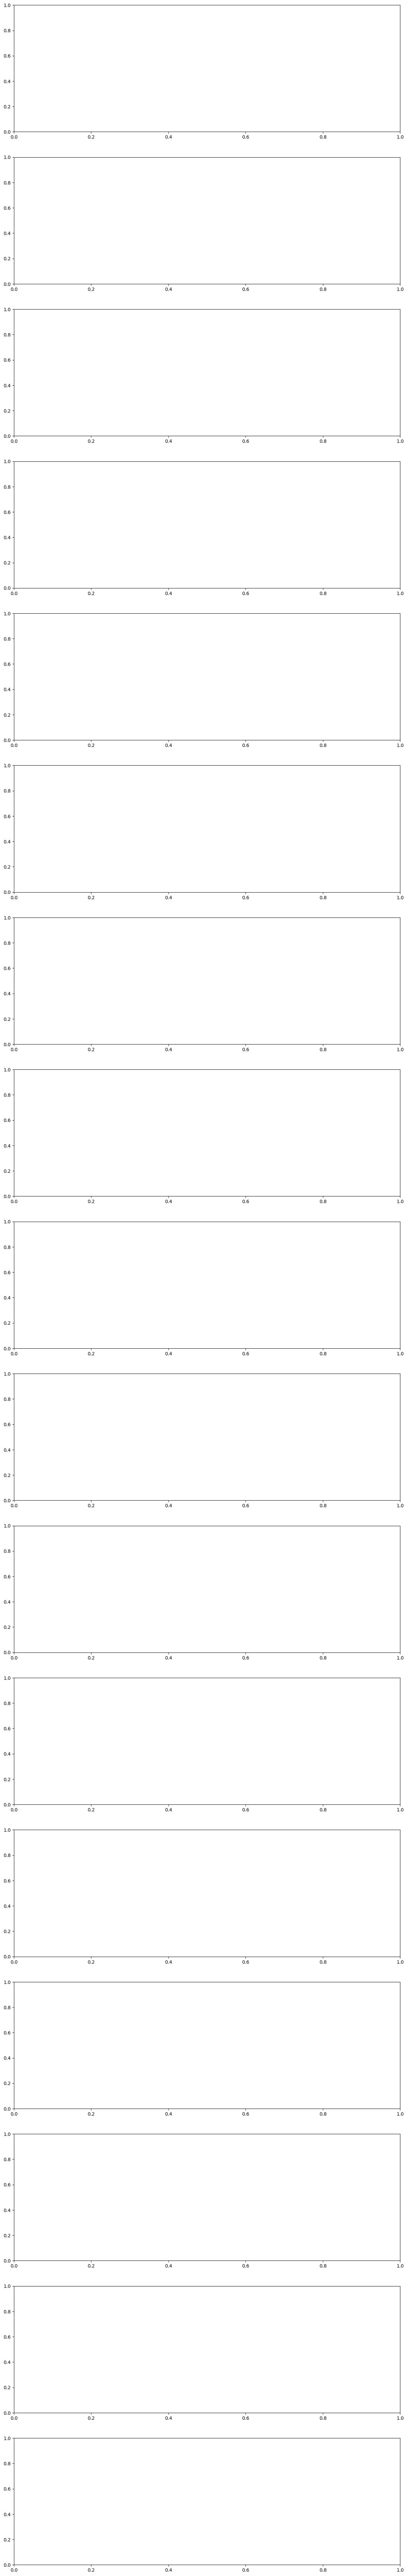

In [5]:
###list of countries the names of which correspond to columns in data file:
countries = ["United Kingdom", "Germany","United States","France","Finland","Belgium","Canada","Italy","Japan","Netherlands","Denmark","Norway","Sweden","Switzerland","New Zealand","Australia","Austria"]



###Constructing plots:

fig, ax = plt.subplots((len(countries)),1, figsize=(15, 100))

countriesAx = {}

counter = 0
for i in countries:
    countriesAx[i] = ax[counter]
    counter += 1

for i in countriesAx:
    
    countriesAx[i].plot(data[DatesColumn],np.log(data[i].astype("float")),"k")
    a = trendlines(countriesAx[i],data,DatesColumn,i,year1=1920,year2=1938)

#plt.savefig("final.png",bbox_inches='tight')    
plt.show()
